In [1]:
import os, sys
project_root_dir = os.path.join(os.getcwd(),'../..')
if project_root_dir not in sys.path:
    sys.path.append(project_root_dir)

import config
from FeatureSelection.Experiments.Dataset import LaparoscopyDataset


In [2]:
dataset = LaparoscopyDataset(os.path.join(config.LAPAROSCOPY_HSI_DIR, 'balanced/OCSP'))
dataset.wv[12], dataset.wv[34], dataset.wv[39]

('1072', '1204', '1234')

In [3]:
model = 'Gaussian05'
# model = 'Concrete03'
data_dir = os.path.join(config.RESULTS_DIR, 'Chapter6/LaparoscopyHSIBandSelection/other/Features/{}/'.format(model))

import pandas as pd
df39 = pd.read_csv(os.path.join(data_dir, 'Band_39.csv'), index_col=0)
df63 = pd.read_csv(os.path.join(data_dir, 'Band_63.csv'), index_col=0)
df9 = pd.read_csv(os.path.join(data_dir, 'Band_9.csv'), index_col=0)

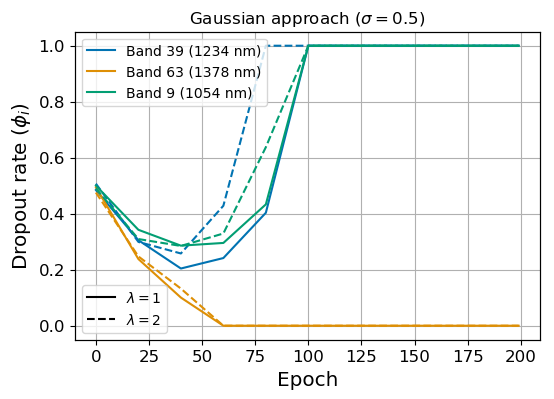

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
import torch
from torch.nn.functional import hardtanh


fig = plt.figure(figsize=(6,4))
band39_reg1 = torch.tensor(df39['Reg1'].values)
band39_reg2 = torch.tensor(df39['Reg2'].values)
band63_reg1 = torch.tensor(df63['Reg1'].values)
band63_reg2 = torch.tensor(df63['Reg2'].values)
band9_reg1 = torch.tensor(df9['Reg1'].values)
band9_reg2 = torch.tensor(df9['Reg2'].values)

reg_1_linestyle = '-'
reg_2_linestyle = '--'


palette = sns.color_palette("colorblind").as_hex()
band_39_color, band_63_color, band_9_color = palette[:3]


if model == 'Gaussian05':
    plt.title('Gaussian approach ($\sigma=0.5$)')
    plt.plot(df39.index.values, hardtanh(band39_reg1, 0, 1), label='Band 39 ({} nm)'.format(dataset.wv[39]), color=band_39_color, linestyle=reg_1_linestyle)
    plt.plot(df39.index.values, hardtanh(band39_reg2, 0, 1), color=band_39_color, linestyle=reg_2_linestyle)
    plt.plot(df63.index.values, hardtanh(band63_reg1, 0, 1), label='Band 63 ({} nm)'.format(dataset.wv[63]), color=band_63_color, linestyle=reg_1_linestyle)
    plt.plot(df63.index.values, hardtanh(band63_reg2, 0, 1), color=band_63_color, linestyle=reg_2_linestyle)
    plt.plot(df9.index.values, hardtanh(band9_reg1, 0, 1), label='Band 9 ({} nm)'.format(dataset.wv[9]), color=band_9_color, linestyle=reg_1_linestyle)
    plt.plot(df9.index.values, hardtanh(band9_reg2, 0, 1), color=band_9_color, linestyle=reg_2_linestyle)
else:
    plt.title(r'Concrete approach ($\tau=0.3$)')
    plt.plot(df39.index.values, torch.sigmoid(band39_reg1), label='Band 39 ({} nm)'.format(dataset.wv[39]), color=band_39_color, linestyle=reg_1_linestyle)
    plt.plot(df39.index.values, torch.sigmoid(band39_reg2), color=band_39_color, linestyle=reg_2_linestyle)
    plt.plot(df63.index.values, torch.sigmoid(band63_reg1), label='Band 63 ({} nm)'.format(dataset.wv[63]), color=band_63_color, linestyle=reg_1_linestyle)
    plt.plot(df63.index.values, torch.sigmoid(band63_reg2), color=band_63_color, linestyle=reg_2_linestyle)
    plt.plot(df9.index.values, torch.sigmoid(band9_reg1), label='Band 9 ({} nm)'.format(dataset.wv[9]), color=band_9_color, linestyle=reg_1_linestyle)
    plt.plot(df9.index.values, torch.sigmoid(band9_reg2), color=band_9_color, linestyle=reg_2_linestyle)


plt.xlabel('Epoch', fontsize='x-large')
plt.ylabel('Dropout rate ($\phi_i$)', fontsize='x-large') 
plt.legend(loc='upper left')
# ticks larger
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.grid(True)

plt.twinx()
plt.plot([0], [0], label='$\lambda=1$', color='black', linestyle=reg_1_linestyle)
plt.plot([0], [0], label='$\lambda=2$', color='black', linestyle=reg_2_linestyle)
plt.yticks([])
# loc bottom left
plt.legend(loc='lower left')

fig.savefig(os.path.join(config.RESULTS_DIR, 'Chapter6/LaparoscopyHSIBandSelection/other/Features/{}.pdf'.format(model)), bbox_inches='tight')

plt.show()


# Sparsity

In [4]:
data_dir = os.path.join(config.RESULTS_DIR, 'Chapter6/LaparoscopyHSIBandSelection/other/Features/Sparsity')

import pandas as pd
sparsity_df = pd.read_csv(os.path.join(data_dir, 'Sparsity.csv'), index_col=0)

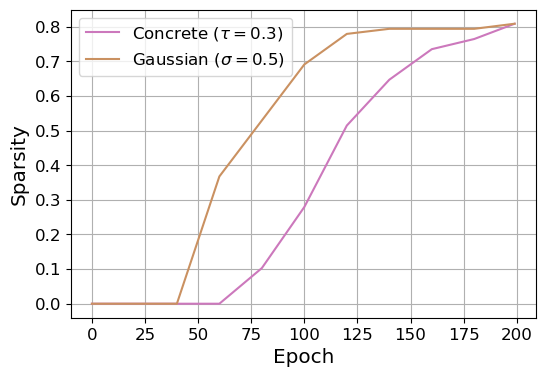

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(6,4))

palette = sns.color_palette("colorblind").as_hex()
concrete_color, gaussian_color = palette[4:6]

plt.plot(sparsity_df.index.values, sparsity_df['Concrete'], label=r'Concrete ($\tau=0.3$)', color=concrete_color)
plt.plot(sparsity_df.index.values, sparsity_df['Gaussian'], label=r'Gaussian ($\sigma = 0.5$)', color=gaussian_color)


plt.xlabel('Epoch', fontsize='x-large')
plt.ylabel('Sparsity', fontsize='x-large') 
plt.legend(loc='upper left', fontsize='large')
# ticks larger
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.grid(True)

fig.savefig(os.path.join(config.RESULTS_DIR, 'Chapter6/LaparoscopyHSIBandSelection/other/Features/Sparsity.pdf'), bbox_inches='tight')

plt.show()
